In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('Crop_recommendation.csv')
df = pd.DataFrame(data)

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.shape

(2200, 8)

In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
df['label_encoded'] = df['label']
df['label_encoded'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [8]:
df = df.drop(columns=['label'])

In [9]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


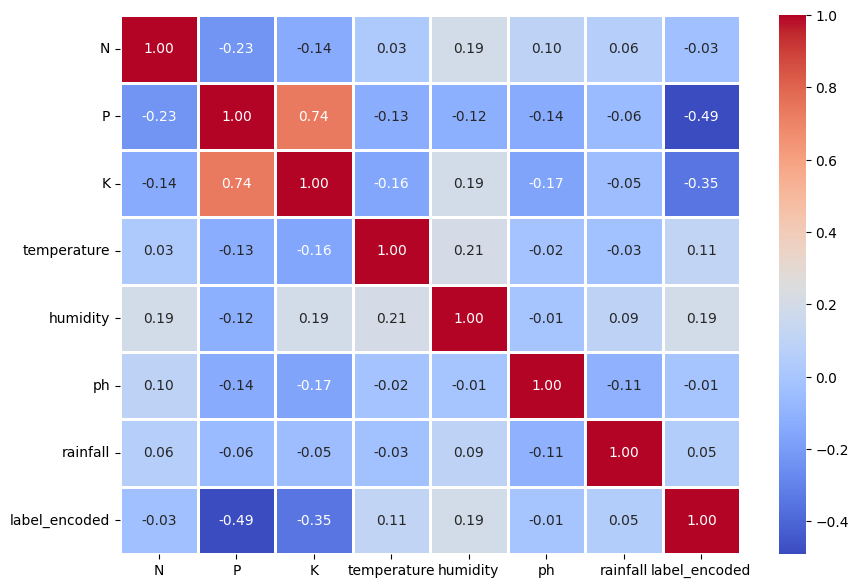

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidths=1)
plt.show()

In [11]:
features = ['N','P','K','temperature','humidity','ph','rainfall']
target = ['label_encoded']

x = df[features].values
y = df[target].values

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test

array([[101.        ,  17.        ,  47.        , ...,  94.72981338,
          6.18505323,  26.30820876],
       [ 98.        ,   8.        ,  51.        , ...,  86.52258079,
          6.25933595,  49.43050977],
       [ 59.        ,  62.        ,  49.        , ...,  93.35191636,
          6.94149681, 114.778071  ],
       ...,
       [121.        ,  47.        ,  16.        , ...,  79.29573149,
          7.72324015,  72.49800885],
       [116.        ,  52.        ,  19.        , ...,  75.37170612,
          6.11452588,  67.08022574],
       [  5.        ,  68.        ,  20.        , ...,  33.10695144,
          6.12166671, 155.3705624 ]], shape=(440, 7))

In [13]:
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier

decision_tree_score = []
for i in range(2, 100):
    decision_tree_classifier = DecisionTreeClassifier(max_leaf_nodes=i)
    decision_tree_classifier.fit(x_train, y_train)
    decision_tree_score.append(decision_tree_classifier.score(x_test, y_test))

decision_tree_accuracy = max(decision_tree_score)
print(f"Decision Tree Accuracy: {decision_tree_accuracy*100}%")

Decision Tree Accuracy: 98.86363636363636%


In [14]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(x_train, y_train)

y_predict = decision_tree_classifier.predict(x_test)

print(f"Classification Report: \n{classification_report(y_test, y_predict)}")

decision_tree_accuracy_score = accuracy_score(y_test, y_predict)
print(f"Accuracy Score: {decision_tree_accuracy_score*100}%")

decision_tree_mae = mean_absolute_error(y_test, y_predict)
print(f"The Mean Absolute Error: {decision_tree_mae}")

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.91      0.87      0.89        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
   

In [15]:
print(decision_tree_classifier.predict([[88, 45, 40, 28, 83, 6.5, 210]]))

[20]


In [16]:
decision_tree_classifier.fit(x_train, y_train)

train_prediction = decision_tree_classifier.predict(x_train)
test_prediction = decision_tree_classifier.predict(x_test)

train_accuracy = accuracy_score(y_train, train_prediction)
test_accuracy = accuracy_score(y_test, test_prediction)

print(f"Classification Report: \n{classification_report(y_test, test_prediction)}")
print(f"Train Accuracy Score: {train_accuracy}")
print(f"Test Accuracy Score: {test_accuracy}")

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.91      0.87      0.89        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       0.93      1.00      0.97        14
   

In [17]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

train_pred = log_reg.predict(x_train)
test_pred = log_reg.predict(x_test)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Classification Report: \n", classification_report(y_test, test_pred))

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.98        21
           2       0.83      0.75      0.79        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.80      0.94      0.86        17
           7       1.00      1.00      1.00        14
           8       0.91      0.87      0.89        23
           9       1.00      0.95      0.97        20
          10       0.83      0.91      0.87        11
          11       0.94      0.76      0.84        21
          12       0.95      1.00      0.97        19
          13       0.85      0.92      0.88        24
          14       0.95      1.00      0.97        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
  

c:\Users\mdmon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mdmon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.neighbors import KNeighborsClassifier

knnlist = []
trainknnlist = []
testknnlist = []

for k in range(1,50):
    knn_classifier = KNeighborsClassifier(n_neighbors=20) # Initialize KNN classifier
    knn_classifier.fit(x_train, y_train) # Train KNN classifier

    train_pred = knn_classifier.predict(x_train) # Predict on the training set
    test_pred = knn_classifier.predict(x_test) # Predict on the test set

    train_accuracy = accuracy_score(y_train, train_pred)
    trainknnlist.append(train_accuracy)
    test_accuracy = accuracy_score(y_test, test_pred)
    testknnlist.append(test_accuracy)

knn_train_accuracy = max(trainknnlist)
knn_test_accuracy = max(testknnlist)

print(f"KNN Classifier Training Accuracy: {round(knn_train_accuracy*100, 2)}%")
print(f"KNN Classifier Testing Accuracy: {round(knn_test_accuracy*100, 2)}%")


c:\Users\mdmon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\mdmon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\mdmon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\mdmon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: 

KNN Classifier Training Accuracy: 97.5%
KNN Classifier Testing Accuracy: 95.45%


In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

train_pred = rf_clf.predict(x_train)
test_pred = rf_clf.predict(x_test)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

# Accuracy score
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

c:\Users\mdmon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Accuracy: 1.0
Testing Accuracy: 0.9931818181818182


In [20]:
import joblib
joblib.dump(rf_clf, 'Crop_recommendation_model.joblib')

['Crop_recommendation_model.joblib']

In [21]:
imported_model = joblib.load('Crop_recommendation_model.joblib')